# Evaulation of Integrated Experiment
We look at the Performance (MAE/MSE) as we did for the integrated evaluation!
We look at the difference in different BWE Metriks and Inventory KPIs

## Evaluation of Performance difference

In [84]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

In [85]:
# berechnung metriken
def inventory_variance_ratio(df:pd.DataFrame, df_market=None, test_time=None):
    t_minus = 200

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []
    
    demand_data = []
    inv_data = []
    for id in ids:
        inv_data.append((df[df['id']==id]['inv'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    inv_data_aggregated = np.sum(inv_data, axis=0)

    inv_mean = np.mean(inv_data_aggregated)
    inv_var = np.var(inv_data_aggregated)
    demand_mean = np.mean(demand_data_aggregated)
    demand_var = np.var(demand_data_aggregated)

    metric_aggregated = ((inv_var)/(inv_mean))/((demand_var)/(demand_mean))

    # demand_data = np.array(df_market['demand'].iloc[-time_interval_start:-time_intervall_stop])
    demand_data = []
    inv_data = []
    for id in ids:

        inv_data = np.array(df[df['id']==id]['inv'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

        inv_mean = np.mean(inv_data)
        inv_var = np.var(inv_data)
        demand_mean = np.mean(demand_data)
        demand_var = np.var(demand_data)
        
        metric_id = ((inv_var)/(inv_mean))/((demand_var)/(demand_mean))

        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def order_variance_ratio(df:pd.DataFrame, df_market=None, test_time=None):
    t_minus = 200

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []

    
    demand_data = []
    order_data = []
    for id in ids:
        order_data.append((df[df['id']==id]['order'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    order_data_aggregated = np.sum(order_data, axis=0)

    order_mean = np.mean(order_data_aggregated)
    order_var = np.var(order_data_aggregated)
    demand_mean = np.mean(demand_data_aggregated)
    demand_var = np.var(demand_data_aggregated)

    metric_aggregated = ((order_var)/(order_mean))/((demand_var)/(demand_mean))

    # demand_data = np.array(df_market['demand'].iloc[-time_interval_start:-time_intervall_stop])
    
    demand_data = []
    order_data = []
    for id in ids:

        order_data = np.array(df[df['id']==id]['order'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

        order_mean = np.mean(order_data)
        order_var = np.var(order_data)
        demand_mean = np.mean(demand_data)
        demand_var = np.var(demand_data)
        
        metric_id = ((order_var)/(order_mean))/((demand_var)/(demand_mean))

        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def bullwhip_ratio_order(df:pd.DataFrame, df_market=None, test_time=None):
    t_minus = 200

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []

    
    demand_data = []
    order_data = []
    for id in ids:
        order_data.append((df[df['id']==id]['order'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    order_data_aggregated = np.sum(order_data, axis=0)

    order_var = np.var(order_data_aggregated)
    demand_var = np.var(demand_data_aggregated)

    metric_aggregated = (order_var)/(demand_var)

    # demand_data = np.array(df_market['demand'].iloc[-time_interval_start:-time_intervall_stop])
    
    demand_data = []
    order_data = []
    for id in ids:

        order_data = np.array(df[df['id']==id]['order'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

    
        order_var = np.var(order_data)
        demand_var = np.var(demand_data)
        
        metric_id = (order_var)/(demand_var)

        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def bullwhip_ratio_inv(df:pd.DataFrame, df_market=None, test_time=None):
    t_minus = 200

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []

    
    demand_data = []
    inv_data = []
    for id in ids:
        inv_data.append((df[df['id']==id]['inv'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    inv_data_aggregated = np.sum(inv_data, axis=0)

    inv_var = np.var(inv_data_aggregated)
    demand_var = np.var(demand_data_aggregated)

    metric_aggregated = (inv_var)/(demand_var)

    # demand_data = np.array(df_market['demand'].iloc[-time_interval_start:-time_intervall_stop])
    
    demand_data = []
    inv_data = []
    for id in ids:

        inv_data = np.array(df[df['id']==id]['inv'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

    
        inv_var = np.var(inv_data)
        demand_var = np.var(demand_data)
        
        metric_id = (inv_var)/(demand_var)

        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def MAE(df:pd.DataFrame, test_time, test_intervall = 50):
    t_minus = test_intervall

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 
    ids = df['id'].unique()
    metric = []

    demand_data = []
    forecast_data = []
    for id in ids:
        forecast_data.append((df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    forecast_data_aggregated = np.sum(forecast_data, axis=0)

    # forecast at t-1 to demand_data at t
    forecast_data_aggregated = forecast_data_aggregated[:-1]
    demand_data_aggregated = demand_data_aggregated[1:]
    metric_aggregated = mean_absolute_error(y_true=demand_data, y_pred=forecast_data)

    demand_data = []
    forecast_data = []
    for id in ids:

        forecast_data = np.array(df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

        # forecast at t-1 to demand_data at t
        forecast_data = forecast_data[:-1]
        demand_data = demand_data[1:]
        
        metric_id = mean_absolute_error(y_true=demand_data, y_pred=forecast_data)
        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def MSE(df:pd.DataFrame, test_time, test_intervall = 50):
    t_minus = test_intervall

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []

    demand_data = []
    forecast_data = []
    for id in ids:
        forecast_data.append((df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    forecast_data_aggregated = np.sum(forecast_data, axis=0)

    # forecast at t-1 to demand_data at t
    forecast_data_aggregated = forecast_data_aggregated[:-1]
    demand_data_aggregated = demand_data_aggregated[1:]

    metric_aggregated = mean_squared_error(y_true=demand_data, y_pred=forecast_data)

    demand_data = []
    forecast_data = []
    for id in ids:

        forecast_data = np.array(df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

        # forecast at t-1 to demand_data at t
        forecast_data = forecast_data[:-1]
        demand_data = demand_data[1:]
        
        metric_id = mean_squared_error(y_true=demand_data, y_pred=forecast_data)
        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

def R2(df:pd.DataFrame, test_time, test_intervall = 50):
    t_minus = test_intervall

    time_interval_start = test_time
    time_intervall_stop = test_time - t_minus 

    ids = df['id'].unique()
    metric = []

    demand_data = []
    forecast_data = []
    for id in ids:
        forecast_data.append((df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop]))
        demand_data.append((df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop]))
    
    demand_data_aggregated = np.sum(demand_data, axis=0)
    forecast_data_aggregated = np.sum(forecast_data, axis=0)

    # forecast at t-1 to demand_data at t
    forecast_data_aggregated = forecast_data_aggregated[:-1]
    demand_data_aggregated = demand_data_aggregated[1:]

    metric_aggregated = r2_score(y_true=demand_data, y_pred=forecast_data)

    demand_data = []
    forecast_data = []
    for id in ids:

        forecast_data = np.array(df[df['id']==id]['forecast'].iloc[-time_interval_start:-time_intervall_stop])
        demand_data = np.array(df[df['id']==id]['demand'].iloc[-time_interval_start:-time_intervall_stop])

        # forecast at t-1 to demand_data at t
        forecast_data = forecast_data[:-1]
        demand_data = demand_data[1:]
        
        metric_id = r2_score(y_true=demand_data, y_pred=forecast_data)
        metric.append(metric_id)
    
    metric_sum = np.sum(metric)

    return metric, metric_sum, metric_aggregated

In [86]:
def list_all_subdirectories(base_path, runs=10, ids = 2, metric = "IVR", test_intervall = 50):
    base_path = Path(base_path)
    colums = ['path', 'sim_time', 'test_time', 'training', 'epochs', 'sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1']
    colums_agent = ['path', 'sim_time', 'test_time', 'training', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1']
    for run in range(runs):
        colum_name = "run_"+str(run)
        colums.append(colum_name)

        for id in range(ids):
            colum_name_agent = f"run_{run}_agent_{id}"
            colums_agent.append(colum_name_agent)

    colums.append('metric_mean')
    # colums.append('metric_std')
    final_list = []
    final_agent_list = []
    final_list_aggregated = []
    for path in base_path.glob('*'):
        if path.is_dir(): 
            if "simulation" in path.stem:
                metric_list = []
                metric_agent_list = []
                metric_list_aggregated = []
                # Open the file and load its contents
                subpath = Path(path,"config.json")
                with open(subpath, 'r') as file:
                    config= json.load(file)
                sim_time = config['sim']['convergence_time'] + config['sim']['simulation_time']
                test_time = config['sim']['testing_time']
                training_typ = config['sim']['training_type']
                if training_typ is None:
                    training_typ = 'None'
                epochs = config['sim']['epochs']
                sequence_length = config['sim']['sequence_length']
                trend = config['market']['trend_magnitude']
                freq = config['market']['seasonality_magnitude']
                mag = config['market']['seasonality_frequncy']
                noise = config['market']['random_walk']['mean']
                share = config['market']['demand_split'][0]
                sc_levels = config['supply_chain']["agents_per_level"]
                leadtime_level = []
                R_level = []

                for i, level in enumerate(sc_levels):
                    key = "sc_level_"+str(i)
                    lead_time_i = config['supply_chain']["sc_levels"][key]["lead_time"]
                    leadtime_level.extend([lead_time_i])
  
                    R_level_i = config['supply_chain']["sc_levels"][key]["R"][0]
                    R_level.extend([R_level_i])
                for run in range(runs):
                    run_path = "run_"+str(run)
                    file_path= Path(path,run_path,"Data", "agent_sc_level_1.csv")
                    market_path= Path(path,run_path,"Data", "market.csv")
                    df = pd.read_csv(file_path)
                    df_market = pd.read_csv(market_path)
                    if metric == "IVR":
                        metric_agents, metric_sum, metric_aggregated = inventory_variance_ratio(df, df_market, test_time)
                    elif metric == "OVR":
                        metric_agents, metric_sum, metric_aggregated = order_variance_ratio(df, df_market, test_time)
                    elif metric == "MAE":
                        metric_agents, metric_sum, metric_aggregated = MAE(df, test_time, test_intervall)
                    elif metric == "MSE":
                        metric_agents, metric_sum, metric_aggregated = MSE(df, test_time, test_intervall)
                    elif metric == "R2":
                        metric_agents, metric_sum, metric_aggregated = R2(df, test_time, test_intervall)
                    elif metric == "BWR_order":
                        metric_agents, metric_sum, metric_aggregated = bullwhip_ratio_order(df, df_market, test_time)
                    elif metric == "BWR_inventory":
                        metric_agents, metric_sum, metric_aggregated = bullwhip_ratio_inv(df, df_market, test_time)
                    else:
                        print("Fallback to Default - Metric: IVR")
                        metric_agents, metric_sum = inventory_variance_ratio(df, df_market, test_time)
                    metric_list.append(metric_sum)
                    metric_agent_list.extend(metric_agents)
                    metric_list_aggregated.append(metric_aggregated)

                metric_mean = np.mean(metric_list)
                # metric_std = np.std(metric_list)
                data = [path.name, sim_time, test_time, training_typ, epochs, sequence_length, trend, freq, mag, noise, share]
                data.extend(leadtime_level)
                data.extend(R_level)
                data.extend(metric_list)
                data.append(metric_mean)
                # data.append(metric_std)
                final_list.append(data)

                data_agent = [path.name, sim_time, test_time, training_typ, epochs, sequence_length,  trend, freq, mag, noise, share]
                data_agent.extend(leadtime_level)
                data_agent.extend(R_level)
                data_agent.extend(metric_agent_list)
                final_agent_list.append(data_agent)

                metric_mean_aggregated = np.mean(metric_list_aggregated)
                data_aggregated = [path.name, sim_time, test_time, training_typ, epochs, sequence_length, trend, freq, mag, noise, share]
                data_aggregated.extend(leadtime_level)
                data_aggregated.extend(R_level)
                data_aggregated.extend(metric_list_aggregated)
                data_aggregated.append(metric_mean_aggregated)
                final_list_aggregated.append(data_aggregated)

    df = pd.DataFrame(final_list, columns=colums)
    df_agent = pd.DataFrame(final_agent_list, columns=colums_agent)
    df_aggregated = pd.DataFrame(final_list_aggregated, columns=colums)
         
    return df, df_agent, df_aggregated, config

### 0) Functions to create evaluation

In [87]:
def write(df:pd.DataFrame, file_path: str, sheet_name:str) -> None:

     with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)

def compare_agent(df:pd.DataFrame, RUNS:int, IDS:int) -> pd.DataFrame:

        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        columns = []
        colums_agent = []
        for run in range(RUNS):
                colum_name = "run_"+str(run)
                columns.append(colum_name)
                for id in range(IDS):
                        colum_name_agent = f"run_{run}_agent_{id}"
                        colums_agent.append(colum_name_agent)

        df_final = pd.DataFrame()
        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()
                                base_sn = "None"
                                base_ln = "None"
                                base_sl = "local"
                                compared_split = "split_multichannel"
                                compared_local = "local_multichannel"

                                split_none = np.round((df_[df_['training']=='split_multichannel'][colums_agent].iloc[0]-df_[df_['training']=='None'][colums_agent].iloc[0])/(df_[df_['training']=='None'][colums_agent].iloc[0]),2)*100
                                local_none = np.round((df_[df_['training']=='local_multichannel'][colums_agent].iloc[0]-df_[df_['training']=='None'][colums_agent].iloc[0])/(df_[df_['training']=='None'][colums_agent].iloc[0]),2)*100
                                split_local = np.round((df_[df_['training']=='split_multichannel'][colums_agent].iloc[0]-df_[df_['training']=='local_multichannel'][colums_agent].iloc[0])/(df_[df_['training']=='local_multichannel'][colums_agent].iloc[0]),2)*100

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs, sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sn, compared_split]).transpose()
                                df_new.columns =  ["sim_time", "test_time", "epochs","sequence_length", "trend", "freq", "mag", "noise", "share", 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_split_none = pd.DataFrame(data=split_none).transpose()
                                df_split_none['mean'] = np.mean(split_none)
                                df_split_none = pd.concat([df_new, df_split_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_ln, compared_local]).transpose()
                                df_new.columns =  ["sim_time", "test_time", "epochs","sequence_length", "trend", "freq", "mag", "noise", "share", 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_local_none = pd.DataFrame(data=local_none).transpose()
                                df_local_none['mean'] = np.mean(local_none)
                                df_local_none = pd.concat([df_new, df_local_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1,  base_sl, compared_split]).transpose()
                                df_new.columns = ["sim_time", "test_time", "epochs", "sequence_length","trend", "freq", "mag", "noise", "share", 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_split_local = pd.DataFrame(data=split_local).transpose()
                                df_split_local['mean'] = np.mean(split_local)
                                df_split_local = pd.concat([df_new, df_split_local], axis=1)
                                
                                df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)

        return df_final

def pareto(df:pd.DataFrame, RUNS:int, IDS:int)->pd.DataFrame:

        data = []
        colums_constant = ["sim_time", "test_time", "epochs","sequence_length", "trend", "freq", "mag", "noise", "share", 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
        df = df.reset_index(drop=True)
        df_constant = df[colums_constant]
        column = []
        for run in range(RUNS):
                colum_name = "run_"+str(run)
                column.append(colum_name)
                c_list = []
        
                for id in range(IDS):
                        colum_name_agent = f"run_{run}_agent_{id}"
                        c_list.append(colum_name_agent)
                rows_less_than_zero = df[c_list].lt(0).all(axis=1).tolist()
                data.append(rows_less_than_zero)

        df_final_agent = pd.DataFrame(data=data).transpose()
        df_final_agent.columns = column
        df_new = df_constant.join(df_final_agent)

        agent_aggr = []
        for id in range(IDS):
                columns = []
        
                for run in range(RUNS):
                        column = f"run_{run}_agent_{id}"
                        columns.append(column)
        df_constant = df[columns]
        agent_aggr.append(df_constant.mean(axis=1).values)

        d =pd.DataFrame(agent_aggr).transpose()
        d = d.lt(0).all(axis=1).tolist()

        df_new['aggregated']=d

        return df_new

def compare_runs(df:pd.DataFrame, RUNS:int, IDS:int):
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        columns = []
        df_final = pd.DataFrame()
        for i in range(RUNS):
                name = "run_"+str(i)
                columns.append(name)

        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()
                                base_sn = "None"
                                base_ln = "None"
                                base_sl = "local"
                                compared_split = "split_multichannel"
                                compared_local = "local_multichannel"
                                
                                split_none = np.round((df_[df_['training']=='split_multichannel'][columns].iloc[0]-df_[df_['training']=='None'][columns].iloc[0])/(df_[df_['training']=='None'][columns].iloc[0]),2)*100
                                local_none = np.round((df_[df_['training']=='local_multichannel'][columns].iloc[0]-df_[df_['training']=='None'][columns].iloc[0])/(df_[df_['training']=='None'][columns].iloc[0]),2)*100
                                split_local = np.round((df_[df_['training']=='split_multichannel'][columns].iloc[0]-df_[df_['training']=='local_multichannel'][columns].iloc[0])/(df_[df_['training']=='local_multichannel'][columns].iloc[0]),2)*100

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sn, compared_split]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs', 'sequence_length','trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1',"base", "compared with"]
                                df_split_none = pd.DataFrame(data=split_none).transpose()
                                df_split_none['mean'] = np.mean(split_none)
                                df_split_none = pd.concat([df_new, df_split_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_ln, compared_local]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_local_none = pd.DataFrame(data=local_none).transpose()
                                df_local_none['mean'] = np.mean(local_none)
                                df_local_none = pd.concat([df_new, df_local_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sl, compared_split]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1',"base", "compared with"]
                                df_split_local = pd.DataFrame(data=split_local).transpose()
                                df_split_local['mean'] = np.mean(split_local)
                                df_split_local = pd.concat([df_new, df_split_local], axis=1)
                                
                                df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)
            

        return df_final

def compare_runs_raw_values(df:pd.DataFrame, RUNS:int, IDS:int):
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        columns = []
        df_final = pd.DataFrame()
        for i in range(RUNS):
                name = "run_"+str(i)
                columns.append(name)

        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()
                                base_sn = "None"
                                base_ln = "None"
                                base_sl = "local"
                                compared_split = "split_multichannel"
                                compared_local = "local_multichannel"
                                
                                split_none = np.round((df_[df_['training']=='split_multichannel'][columns].iloc[0]-df_[df_['training']=='None'][columns].iloc[0]))
                                local_none = np.round((df_[df_['training']=='local_multichannel'][columns].iloc[0]-df_[df_['training']=='None'][columns].iloc[0]))
                                split_local = np.round((df_[df_['training']=='split_multichannel'][columns].iloc[0]-df_[df_['training']=='local_multichannel'][columns].iloc[0]))

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sn, compared_split]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs', 'sequence_length','trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1',"base", "compared with"]
                                df_split_none = pd.DataFrame(data=split_none).transpose()
                                df_split_none['mean'] = np.mean(split_none)
                                df_split_none = pd.concat([df_new, df_split_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_ln, compared_local]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_local_none = pd.DataFrame(data=local_none).transpose()
                                df_local_none['mean'] = np.mean(local_none)
                                df_local_none = pd.concat([df_new, df_local_none], axis=1)

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sl, compared_split]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share','lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1',"base", "compared with"]
                                df_split_local = pd.DataFrame(data=split_local).transpose()
                                df_split_local['mean'] = np.mean(split_local)
                                df_split_local = pd.concat([df_new, df_split_local], axis=1)
                                
                                df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)
            

        return df_final

def system_raw_values(df:pd.DataFrame):
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        df_final = pd.DataFrame()
        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()
                                metric_MA = df_[df_['training']=='None']['metric_mean'].values[0]
                                metric_local = df_[df_['training']=='local_multichannel']['metric_mean'].values[0]
                                metric_split = df_[df_['training']=='split_multichannel']['metric_mean'].values[0]

                                df_new = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1]).transpose()
                                df_new.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1']
                                df_new['metric_MA'] = metric_MA
                                df_new['metric_local'] = metric_local
                                df_new['metric_split'] = metric_split
                                df_final = pd.concat([df_final, df_new], axis=0)

        return df_final

def pairedTtest(df:pd.DataFrame, RUNS:int)-> pd.DataFrame:
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        columns = []
        df_final = pd.DataFrame()
        for i in range(RUNS):
                name = "run_"+str(i)
                columns.append(name)
        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()

                                base_sn = "None"
                                base_ln = "None"
                                base_sl = "local"
                                compared_split = "split_multichannel"
                                compared_local = "local_multichannel"
                                
                                split = df_[df_['training']=='split_multichannel'][columns].iloc[0]
                                local = df_[df_['training']=='local_multichannel'][columns].iloc[0]
                                none = df_[df_['training']=='None'][columns].iloc[0]

                                # test split - none
                                T, p_sn = stats.ttest_rel(split, none, alternative='less')
                                # test local - none
                                T, p_ln = stats.ttest_rel(local, none, alternative='less')
                                # test split - local
                                T, p_sl = stats.ttest_rel(split, local, alternative='less')
                                
                                df_split_none= pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sn, compared_split]).transpose()
                                df_split_none.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_split_none["p_value"] = p_sn
                                df_split_none["5%"] = p_sn<0.05
                                df_split_none["1%"] = p_sn<0.01
                                df_split_none["0.1%"] = p_sn<0.001

                                if p_sn<0.001:
                                        df_split_none["sig_level"] = "***"
                                elif p_sn<0.01:
                                        df_split_none["sig_level"] = "**"
                                elif p_sn<0.05:
                                        df_split_none["sig_level"] = "*"
                                else:
                                        df_split_none["sig_level"] = "n.s"


                                df_local_none = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1,base_ln, compared_local]).transpose()
                                df_local_none.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1',  "base", "compared with"]
                                df_local_none["p_value"] = p_ln
                                df_local_none["5%"] = p_ln<0.05
                                df_local_none["1%"] = p_ln<0.01
                                df_local_none["0.1%"] = p_ln<0.001

                                if p_ln<0.001:
                                        df_local_none["sig_level"] = "***"
                                elif p_ln<0.01:
                                        df_local_none["sig_level"] = "**"
                                elif p_ln<0.05:
                                        df_local_none["sig_level"] = "*"
                                else:
                                        df_local_none["sig_level"] = "n.s"

                                df_split_local = pd.DataFrame(data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share,leadtime_l0, leadtime_l1, R_l0, R_l1, base_sl, compared_split]).transpose()
                                df_split_local.columns =  ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                df_split_local ["p_value"] = p_sl
                                df_split_local["5%"] = p_sl<0.05
                                df_split_local["1%"] = p_sl<0.01
                                df_split_local["0.1%"] = p_sl<0.001

                                if p_sl<0.001:
                                        df_split_local["sig_level"] = "***"
                                elif p_sl<0.01:
                                        df_split_local["sig_level"] = "**"
                                elif p_sl<0.05:
                                        df_split_local["sig_level"] = "*"
                                else:
                                        df_split_local["sig_level"] = "n.s"
                                
                                df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)

        return df_final

def pairedTtestAgent(df:pd.DataFrame, RUNS:int, num_agents:int = 3)-> pd.DataFrame: # ToDo: Funktion anpassen
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        df_final = pd.DataFrame()
        columns = {}
        for agent_id in range(num_agents):
                column = []
                for i in range(RUNS):
                        name = "run_"+str(i)+"_agent_"+str(agent_id)
                        column.append(name)
                columns[agent_id] = column
        for share in share_unique:
                df_share = df[df['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                sim_time = df_['sim_time'].unique()[0]
                                test_time = df_['test_time'].unique()[0]
                                epochs = df_['epochs'].unique()[0]
                                sequence_length = df_['sequence_length'].unique()[0]
                                trend = df_['trend'].unique()[0]
                                freq = df_['freq'].unique()[0]
                                mag = df_['mag'].unique()[0]
                                noise = df_['noise'].unique()[0]
                                share = df_['share'].unique()[0]
                                leadtime_l0 = df_['lead_time_l0'].unique()
                                leadtime_l1 = df_['lead_time_l1'].unique()
                                R_l0 = df_['R_l0'].unique()
                                R_l1 = df_['R_l1'].unique()

                                base_sn = "None"
                                base_ln = "None"
                                base_sl = "local"
                                compared_split = "split_multichannel"
                                compared_local = "local_multichannel"

                                p_columns = []
                                p_sn_list = []
                                p_ln_list = []
                                p_sl_list = []
                                
                                for agent_id in range(num_agents):
                                        p_columns.append("p_value_agent_"+str(agent_id))
                                        
                                        
                                        split = df_[df_['training']=='split_multichannel'][columns[agent_id]].iloc[0]
                                        local = df_[df_['training']=='local_multichannel'][columns[agent_id]].iloc[0]
                                        none = df_[df_['training']=='None'][columns[agent_id]].iloc[0]


                                        # test split - none
                                        T, p_sn = stats.ttest_rel(split, none, alternative='less')
                                        # test local - none
                                        T, p_ln = stats.ttest_rel(local, none, alternative='less')
                                        # test split - local
                                        T, p_sl = stats.ttest_rel(split, local, alternative='less')

                                        p_sn_list.append(p_sn)
                                        p_ln_list.append(p_ln)
                                        p_sl_list.append(p_sl)
                                
                                colums_df = ['sim_time', 'test_time', 'epochs','sequence_length', 'trend', 'freq', 'mag', 'noise', 'share', 'lead_time_l0', 'lead_time_l1',
              'R_l0', 'R_l1', "base", "compared with"]
                                colums_df.extend(p_columns)

                                data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sn, compared_split]
                                data.extend(p_sn_list)
                                df_split_none= pd.DataFrame(data=data).transpose()
                                df_split_none.columns =  colums_df
                                df_split_none["5%"] = all(x < 0.05 for x in p_sn_list)
                                df_split_none["1%"] = all(x < 0.01 for x in p_sn_list)
                                df_split_none["0.1%"] = all(x < 0.001 for x in p_sn_list)

                                if all(x < 0.05 for x in p_sn_list):
                                        df_split_none["sig_level"] = "***"
                                elif all(x < 0.05 for x in p_sn_list):
                                        df_split_none["sig_level"] = "**"
                                elif all(x < 0.05 for x in p_sn_list):
                                        df_split_none["sig_level"] = "*"
                                else:
                                        df_split_none["sig_level"] = "n.s"

                                data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_ln, compared_local]
                                data.extend(p_ln_list)
                                df_local_none = pd.DataFrame(data=data).transpose()
                                df_local_none.columns =  colums_df
                                df_local_none["5%"] = all(x < 0.05 for x in p_ln_list)
                                df_local_none["1%"] = all(x < 0.01 for x in p_ln_list)
                                df_local_none["0.1%"] = all(x < 0.001 for x in p_ln_list)

                                if all(x < 0.05 for x in p_ln_list):
                                        df_local_none["sig_level"] = "***"
                                elif all(x < 0.05 for x in p_ln_list):
                                        df_local_none["sig_level"] = "**"
                                elif all(x < 0.05 for x in p_ln_list):
                                        df_local_none["sig_level"] = "*"
                                else:
                                        df_local_none["sig_level"] = "n.s"

                                data=[sim_time, test_time, epochs,sequence_length, trend, freq, mag, noise, share, leadtime_l0, leadtime_l1, R_l0, R_l1, base_sl, compared_split]
                                data.extend(p_sl_list)
                                df_split_local = pd.DataFrame(data=data).transpose()
                                df_split_local.columns =  colums_df
                                df_split_local["5%"] = all(x < 0.05 for x in p_sl_list)
                                df_split_local["1%"] = all(x < 0.01 for x in p_sl_list)
                                df_split_local["0.1%"] = all(x < 0.001 for x in p_sl_list)

                                if all(x < 0.05 for x in p_sl_list):
                                        df_split_local["sig_level"] = "***"
                                elif all(x < 0.05 for x in p_sl_list):
                                        df_split_local["sig_level"] = "**"
                                elif all(x < 0.05 for x in p_sl_list):
                                        df_split_local["sig_level"] = "*"
                                else:
                                        df_split_local["sig_level"] = "n.s"
                                
                                df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)


        return df_final

### 1) Evaluation: raw data and comparison of on different levels (agents, runs_ind, runs_aggr, level)

In [88]:
paths = ["Results/Experiment_I", "Results/Experiment_II", "Results/Experiment_III"]
file_paths = ["Evaluation_Overview_Experiment_I.xlsx", "Evaluation_Overview_Experiment_II.xlsx", "Evaluation_Overview_Experiment_III.xlsx"]

from openpyxl import Workbook

for file_path in file_paths:
    # Ein neues Workbook erstellen
    wb = Workbook()

    # Optional: Ein Blatt hinzufügen (Ein leeres Workbook hat standardmäßig ein Blatt)
    ws = wb.active
    ws.title = "LeeresBlatt"

    # Die Excel-Datei speichern
    wb.save(file_path)

In [89]:
for i, path in enumerate(paths):
    IDS = 3
    RUNS = 10
    # metrics = ['IVR', 'OVR', 'BWR_order','BWR_inventory', 'MAE']
    metrics = ['MAE', 'MSE']
    file_path = file_paths[i]
    for metric in metrics:
        print(f"Metric: {metric}")
        df, df_agent, df_aggregated, config = list_all_subdirectories(path, runs=10, ids=IDS, metric = metric)

        # save raw values
        print(f"{metric}_raw_run_ind")
        sheet_name = f"{metric}_raw_run_ind"
        write(df,file_path=file_path, sheet_name=sheet_name)

        print(f"{metric}_raw_agent")
        sheet_name = f"{metric}_raw_agent"
        write(df_agent,file_path=file_path, sheet_name=sheet_name)

        print(f"{metric}_raw_agent_aggr")
        sheet_name = f"{metric}_raw_agent_aggr"
        write(df_aggregated,file_path=file_path, sheet_name=sheet_name)

        print(f"{metric}_compar_agent")
        sheet_name = f"{metric}_compar_agent"
        df_final_c_a = compare_agent(df=df_agent, RUNS=RUNS, IDS=IDS)
        write(df_final_c_a, file_path, sheet_name)

        print(f"{metric}_pareto")
        sheet_name = f"{metric}_pareto"
        df_final_pareto = pareto(df=df_final_c_a, RUNS=RUNS, IDS=IDS)
        write(df_final_pareto, file_path, sheet_name)

        print(f"{metric}_compar_run_ind")
        sheet_name = f"{metric}_compar_run_ind"
        df_final_c_run = compare_runs(df=df, RUNS=RUNS, IDS=IDS)
        write(df_final_c_run, file_path, sheet_name)

        print(f"{metric}_compar_run_ind_raw")
        sheet_name = f"{metric}_compar_run_ind_raw"
        df_final_c_run_raw = compare_runs_raw_values(df=df, RUNS=RUNS, IDS=IDS)
        # write(df_final_c_run, file_path, sheet_name)

        print(f"{metric}_market_level")
        sheet_name = f"{metric}_market_level"
        df_final_m_l = system_raw_values(df)
        write(df_final_m_l, file_path, sheet_name)

        print(f"{metric}_pTtest_run_ind")
        sheet_name = f"{metric}_pTtest_run_ind"
        df_final_pT = pairedTtest(df, RUNS=RUNS)
        write(df_final_pT, file_path, sheet_name)

        print(f"{metric}_Agent_pTtest_run_ind")
        sheet_name = f"{metric}_Agent_pTtest_run_ind"
        test_df_agent_Ttest = pairedTtestAgent(df_agent, RUNS=10)
        write(test_df_agent_Ttest, file_path, sheet_name)


Metric: MAE
MAE_raw_run_ind
MAE_raw_agent
MAE_raw_agent_aggr
MAE_compar_agent
MAE_pareto
MAE_compar_run_ind
MAE_compar_run_ind_raw
MAE_market_level
MAE_pTtest_run_ind
MAE_Agent_pTtest_run_ind
Metric: MSE
MSE_raw_run_ind
MSE_raw_agent
MSE_raw_agent_aggr
MSE_compar_agent
MSE_pareto
MSE_compar_run_ind
MSE_compar_run_ind_raw
MSE_market_level
MSE_pTtest_run_ind
MSE_Agent_pTtest_run_ind
Metric: MAE
MAE_raw_run_ind
MAE_raw_agent
MAE_raw_agent_aggr
MAE_compar_agent
MAE_pareto
MAE_compar_run_ind
MAE_compar_run_ind_raw
MAE_market_level
MAE_pTtest_run_ind
MAE_Agent_pTtest_run_ind
Metric: MSE
MSE_raw_run_ind
MSE_raw_agent
MSE_raw_agent_aggr
MSE_compar_agent
MSE_pareto
MSE_compar_run_ind
MSE_compar_run_ind_raw
MSE_market_level
MSE_pTtest_run_ind
MSE_Agent_pTtest_run_ind
Metric: MAE
MAE_raw_run_ind
MAE_raw_agent
MAE_raw_agent_aggr
MAE_compar_agent
MAE_pareto
MAE_compar_run_ind
MAE_compar_run_ind_raw
MAE_market_level
MAE_pTtest_run_ind
MAE_Agent_pTtest_run_ind
Metric: MSE
MSE_raw_run_ind
MSE_raw_agen

## create reporting of paired T-test - system

In [90]:
def return_scenario(freq, noise):
    scenario = ""
    if freq == 5:
        if noise == 0:
            scenario = f"Scenario 1 ({freq}, {noise})"
        if noise == 10:
            scenario = f"Scenario 2 ({freq}, {noise})"
        if noise == 100:
            scenario = f"Scenario 3 ({freq}, {noise})"
    
    if freq == 15:
        if noise == 0:
            scenario = f"Scenario 4 ({freq}, {noise})"
        if noise == 10:
            scenario = f"Scenario 5 ({freq}, {noise})"
        if noise == 100:
            scenario = f"Scenario 6 ({freq}, {noise})"

    if freq == 30:
        if noise == 0:
            scenario = f"Scenario 7 ({freq}, {noise})"
        if noise == 10:
            scenario = f"Scenario 8 ({freq}, {noise})"
        if noise == 100:
            scenario = f"Scenario 9 ({freq}, {noise})"

    return scenario

In [91]:
def create_system_table(df_system: pd.DataFrame, RUNS=10):
    df_final = pd.DataFrame()
    columns = []

    freq_unique = np.sort(df_system['freq'].unique())
    noise_unique = np.sort(df_system['noise'].unique())
    share_unique = np.sort(df_system['share'].unique())
    leadtimes_unique = np.sort(df_system['lead_time_l0'].unique())

    for i in range(RUNS):
        name = "run_"+str(i)
        columns.append(name)


    for l, leadtime in enumerate(leadtimes_unique):
        df_L = pd.DataFrame()
        df_leadtime = df_system[df_system['lead_time_l0']==leadtime]
        for i, share in enumerate(share_unique):
            df_share = df_leadtime[df_leadtime['share']==share]
            for j, freq in enumerate(freq_unique):
                df_freq = df_share[df_share['freq']==freq]
                for k, noise in enumerate(noise_unique):
                    df_ = df_freq[df_freq['noise']==noise]

                    scenario = return_scenario(freq=freq, noise=noise)
                    # leadtime_column = f"L = {leadtime}"
                    leadtime_column = "Leadtime"
                    base_sn = "MAncl"
                    base_ln = "MAncl"
                    base_sl = "MLncl"
                    compared_split = "MLcl"
                    compared_local = "MLncl"
                    
                    split = df_[df_['training']=='MLcl'][columns].iloc[0]
                    local = df_[df_['training']=='MLncl'][columns].iloc[0]
                    none = df_[df_['training']=='MAncl'][columns].iloc[0]

                    split_mean = np.round(np.mean(df_[df_['training']=='MLcl'][columns].iloc[0]), 0)
                    local_mean = np.round(np.mean(df_[df_['training']=='MLncl'][columns].iloc[0]), 0)
                    none_mean = np.round(np.mean(df_[df_['training']=='MAncl'][columns].iloc[0]), 0)

                    split_std = np.round(np.std(df_[df_['training']=='MLcl'][columns].iloc[0]), 0)
                    local_std = np.round(np.std(df_[df_['training']=='MLncl'][columns].iloc[0]), 0)
                    none_std = np.round(np.std(df_[df_['training']=='MAncl'][columns].iloc[0]), 0)


                    # test split - none
                    T, p_sn = stats.ttest_rel(split, none, alternative='less')
                    if p_sn<0.001:
                            sn_sig = "***"
                    elif p_sn<0.01:
                            sn_sig = "**"
                    elif p_sn<0.05:
                            sn_sig = "*"
                    else:
                            sn_sig = "n.s"
                    # test local - none
                    T, p_ln = stats.ttest_rel(local, none, alternative='less')
                    if p_ln<0.001:
                            ln_sig = "***"
                    elif p_sn<0.01:
                            ln_sig = "**"
                    elif p_sn<0.05:
                            ln_sig = "*"
                    else:
                            ln_sig = "n.s"
                    # test split - local
                    T, p_sl = stats.ttest_rel(split, local, alternative='less')
                    if p_sl<0.001:
                            sl_sig = "***"
                    elif p_sl<0.01:
                            sl_sig = "**"
                    elif p_sl<0.05:
                            sl_sig = "*"
                    else:
                            sl_sig= "n.s"

            
                    # MAncl vs MLcl

                    mae_sn = f"{split_mean} ± {split_std} ({sn_sig})"
                    mae_ln = f"{local_mean} ± {local_std} ({ln_sig})" 
                    mae_sl = f"{split_mean} ± {split_std} ({sl_sig})"  

                    df_split_none  = pd.DataFrame(data=[scenario, base_sn, compared_split, leadtime, mae_sn]).transpose()
                    df_split_none .columns =  ["Scenario (Freq, Noise)", "base", "compared with", leadtime_column, "MAE"]

                    df_local_none  = pd.DataFrame(data=[scenario, base_ln, compared_local, leadtime, mae_ln]).transpose()
                    df_local_none.columns = ["Scenario (Freq, Noise)", "base", "compared with", leadtime_column, "MAE"]

                    df_split_local  = pd.DataFrame(data=[scenario, base_sl, compared_split, leadtime, mae_sl]).transpose()
                    df_split_local.columns =  ["Scenario (Freq, Noise)", "base", "compared with", leadtime_column, "MAE"]
                    
                    df_final = pd.concat([df_final, df_split_none, df_local_none, df_split_local], axis=0)

    scenario_unique = df_final['Scenario (Freq, Noise)'].unique()
    scenario_base = df_final['base'].unique()
    scenario_cw = df_final['compared with'].unique()

    df_system_final = pd.DataFrame()
    for scenario in scenario_unique:
        for base in scenario_base:
            for compared in scenario_cw:
                if base == compared:
                    pass
                else:
                    df_ = df_final[(df_final['Scenario (Freq, Noise)']==scenario) & (df_final['base']==base) & (df_final['compared with']==compared)]

                    leadtimes_unique = df_['Leadtime'].unique()
                    data = [scenario, base, compared]
                    df_new = pd.DataFrame(data=data).transpose()
                    df_new.columns = ['Scenario (Freq, Noise)', 'base', 'compared with']

                    for leadtime in leadtimes_unique:
                        col = f"L = {leadtime}"
                        df_new[col] = df_[df_['Leadtime']==leadtime]['MAE'].iloc[0]

                    df_system_final = pd.concat([df_system_final, df_new])

    return df_system_final 

In [92]:
# load all data frames
for metric in metrics:
    df_list = []
    for file_path in file_paths:
        
        df_agent = pd.read_excel(file_path, sheet_name= f"{metric}_raw_run_ind")
        # df_agent['base'] = df_agent['base'].replace({'None': ' MAncl', 'local': 'MLncl'})
        df_agent['training'] = df_agent['training'].replace({'split_multichannel': 'MLcl', 'local_multichannel': 'MLncl', 'None': 'MAncl'})
        df_list.append(df_agent)
    df_system = pd.concat(df_list)
    df_system_final = create_system_table(df_system=df_system)
    
    df_system_final.to_excel(f'{metric}_System_PairedT_Test_Results.xlsx', index=False)

## create reporting of paired T-test - agent

In [93]:
def create_agent_table(df_agent):
        freq_unique = np.sort(df_agent['freq'].unique())
        noise_unique = np.sort(df_agent['noise'].unique())
        share_unique = np.sort(df_agent['share'].unique())
        df_final = pd.DataFrame()
        columns = {}
        num_agents = 3
        for agent_id in range(num_agents):
                column = []
                for i in range(RUNS):
                    name = "run_"+str(i)+"_agent_"+str(agent_id)
                    column.append(name)
                columns[agent_id] = column
        for share in share_unique:
                df_share = df_agent[df_agent['share']==share]
                for freq in freq_unique:
                        df_freq = df_share[df_share['freq']==freq]
                        for noise in noise_unique:
                                df_ = df_freq[df_freq['noise']==noise]
                                scenario = return_scenario(freq=freq, noise=noise)

                                base_sn = "MAncl"
                                base_ln = "MAncl"
                                base_sl = "MLncl"
                                compared_split = "MLcl"
                                compared_local = "MLncl"

                                p_sn_list = []
                                p_ln_list = []
                                p_sl_list = []
                                
                                df_sn = pd.DataFrame(data=[scenario, base_sn, compared_split]).transpose()
                                df_sn.columns = ['Scenario (Freq, Noise)', 'base', 'compared with']

                                df_ln = pd.DataFrame(data=[scenario, base_ln, compared_local]).transpose()
                                df_ln.columns = ['Scenario (Freq, Noise)', 'base', 'compared with']

                                df_sl = pd.DataFrame(data=[scenario, base_sl, compared_split]).transpose()
                                df_sl.columns = ['Scenario (Freq, Noise)', 'base', 'compared with']

                                for agent_id in range(num_agents):
                                        
                                        split = df_[df_['training']=='MLcl'][columns[agent_id]].iloc[0]
                                        local = df_[df_['training']=='MLncl'][columns[agent_id]].iloc[0]
                                        none = df_[df_['training']=='MAncl'][columns[agent_id]].iloc[0]

                                        split_mean = np.round(np.mean(split), 0)
                                        local_mean = np.round(np.mean(local), 0)
                                        none_mean = np.round(np.mean(none), 0)

                                        split_std = np.round(np.std(split), 0)
                                        local_std = np.round(np.std(local), 0)
                                        none_std = np.round(np.std(none), 0)

                                        # test split - none
                                        T, p_sn = stats.ttest_rel(split, none, alternative='less')
                                        if p_sn<0.001:
                                                sn_sig = "***"
                                        elif p_sn<0.01:
                                                sn_sig = "**"
                                        elif p_sn<0.05:
                                                sn_sig = "*"
                                        else:
                                                sn_sig = "n.s"
                                        # test local - none
                                        T, p_ln = stats.ttest_rel(local, none, alternative='less')
                                        if p_ln<0.001:
                                                ln_sig = "***"
                                        elif p_sn<0.01:
                                                ln_sig = "**"
                                        elif p_sn<0.05:
                                                ln_sig = "*"
                                        else:
                                                ln_sig = "n.s"
                                        # test split - local
                                        T, p_sl = stats.ttest_rel(split, local, alternative='less')
                                        if p_sl<0.001:
                                                sl_sig = "***"
                                        elif p_sl<0.01:
                                                sl_sig = "**"
                                        elif p_sl<0.05:
                                                sl_sig = "*"
                                        else:
                                                sl_sig= "n.s"

                                        mae_sn = f"{split_mean} ± {split_std} ({sn_sig})"
                                        mae_ln = f"{local_mean} ± {local_std} ({ln_sig})" 
                                        mae_sl = f"{split_mean} ± {split_std} ({sl_sig})"  
                                        
                                        col = f"Agent {agent_id}"
                                        df_sn[col] = mae_sn

                                        df_ln[col] = mae_ln

                                        df_sl[col] = mae_sl

                                        p_sn_list.append(p_sn)
                                        p_ln_list.append(p_ln)
                                        p_sl_list.append(p_sl)

                                df_final = pd.concat([df_final, df_sn, df_ln, df_sl], axis=0)
        return df_final
                

In [94]:
# load all data frames
for metric in metrics:
    # Ein neues Workbook erstellen
    excel_file_path = f"{metric}_Agent_Table.xlsx"
    wb = Workbook()

    # Die Excel-Datei speichern
    wb.save(excel_file_path)
    df_list = []
    for file_path in file_paths:
        
        df_agent = pd.read_excel(file_path, sheet_name= "MAE_raw_agent")
        # df_agent['base'] = df_agent['base'].replace({'None': ' MAncl', 'local': 'MLncl'})
        df_agent['training'] = df_agent['training'].replace({'split_multichannel': 'MLcl', 'local_multichannel': 'MLncl', 'None': 'MAncl'})
        df_list.append(df_agent)
    
    for i, df_i in enumerate(df_list):
        # print(df_i)
        sheet_name = f"{metric}_agent_table_leadtime_{i}"
        df_final = create_agent_table(df_i)
        write(df_final, excel_file_path, sheet_name)

## Create the figures

In [96]:
import matplotlib.ticker as ticker
# Set the formatter for the y-axis to include commas


### Create figures for the results at system level

In [100]:
sns.set_style("darkgrid")

for metric in metrics:
    for p, path in enumerate(paths):
        df, df_agent, df_aggregated, config = list_all_subdirectories(path, runs=10, ids=IDS, metric = metric)
        df['training'] = df['training'].replace({'split_multichannel': 'ML (colaborative)', 
                                                'local_multichannel': 'ML (noncolaborative)', 
                                                'None': 'Moving average (noncolaborative)'})
        ### prepare data for barplot
        freq_unique = np.sort(df['freq'].unique())
        noise_unique = np.sort(df['noise'].unique())
        share_unique = np.sort(df['share'].unique())
        count = 0 
        columns = []
        df_barplot = pd.DataFrame()
        for i in range(RUNS):
            name = "run_"+str(i)
            columns.append(name)
        for i, share in enumerate(share_unique):
            df_share = df[df['share']==share]
            for j, freq in enumerate(freq_unique):
                df_freq = df_share[df_share['freq']==freq]
                for k, noise in enumerate(noise_unique):
                    df_ = df_freq[df_freq['noise']==noise]
                    data = [f"{freq, noise}"]*3 # times of different training methods

                    data_training = df_['training']
                    data_runs = df_[columns]
                    data_runs = data_runs.reset_index(drop=True)
                    data_final = pd.DataFrame([data, data_training]).transpose()
                    data_final.columns = ['Market scenario (freq, noise)', 'Training']
                    df_count = pd.concat([data_final,data_runs], axis=1)
                    df_barplot = pd.concat([df_barplot, df_count])
                    count += 1

        ### prepare figure
        hue_order = ['Moving average (noncolaborative)', 'ML (noncolaborative)', 'ML (colaborative)']
        # Pivoting des DataFrames, um eine lange Form zu erstellen
        df_long = df_barplot.melt(id_vars=['Market scenario (freq, noise)', 'Training'], 
                        value_vars=columns, 
                        var_name='Messung', value_name='Wert')

        # Erstellen eines Gruppen-Balkendiagramms
        img_path = f'{metric}_Results_System_leadtime_{(p+1)}.png'
        # plt.figure(figsize=(10, 6))
        fig, ax = plt.subplots(figsize=(10, 6))
        if metric == "MAE":
            plt.ylabel("Mean absolute error", size = 12, fontweight='bold')
        if metric == "MSE":
            plt.ylabel("Mean squared error", size = 12, fontweight='bold')
        
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
        
        ax = sns.barplot(data=df_long, x='Market scenario (freq, noise)', y='Wert', hue='Training', errorbar='sd', capsize=.1, 
                    palette=['blue', 'red', 'green'], hue_order = hue_order)
        # sns.barplot(data=df_long, x='Market Scenario (Freq, Noise)', y='Wert', hue='Training', errorbar='sd', capsize=.1, 
        #             hue_order = hue_order)
        
        plt.legend(loc= 2)
        ax.set_xlabel(ax.get_xlabel(), fontweight='bold', size = 12)
        plt.tight_layout()
        plt.savefig(img_path)
        plt.close()


0
1
2
0
1
2


### Create figures for the results at agent level

In [ ]:
sns.set_style("darkgrid")

for metric in metrics:
    for p, path in enumerate(paths):
        df, df_agent, df_aggregated, config = list_all_subdirectories(path, runs=10, ids=IDS, metric = metric)
        df_agent['training'] = df_agent['training'].replace({'split_multichannel': 'ML (colaborative)', 
                                                'local_multichannel': 'ML (noncolaborative)', 
                                                'None': 'Moving average (noncolaborative)'})
        ### prepare data for barplot
        freq_unique = np.sort(df_agent['freq'].unique())
        noise_unique = np.sort(df_agent['noise'].unique())
        share_unique = np.sort(df_agent['share'].unique())
        training_unique = np.sort(df_agent['training'].unique())
        count = 0 
        columns = []
        df_barplot = pd.DataFrame()
        column = []

        for run in range(RUNS):
                colum_name = "run_"+str(run)
                column.append(colum_name)

                for id in range(IDS):
                        colum_name_agent = f"run_{run}_agent_{id}"
                        columns.append(colum_name_agent)
        for i, share in enumerate(share_unique):
            df_share = df_agent[df_agent['share']==share]
            for j, freq in enumerate(freq_unique):
                df_freq = df_share[df_share['freq']==freq]
                for k, noise in enumerate(noise_unique):
                    df_noise = df_freq[df_freq['noise']==noise]
                    for m, training in enumerate(training_unique):
                        df_ = df_noise[df_noise['training']==training]
                        for id in range(IDS):
                            c_list = []
                            for run in range(RUNS):
                                colum_name_agent = f"run_{run}_agent_{id}"
                                c_list.append(colum_name_agent)
                            
                            df_values = df_[c_list]
                            df_values = df_values.reset_index(drop=True)
                            df_values.columns = column
                            data = [f"{freq, noise}", training, str(id)] # times of different training methods
                            df_data = pd.DataFrame(data).transpose()
                            df_data.columns = ['Market scenario (freq, noise)', 'Training', 'Agent']

                            df_count = pd.concat([df_data,df_values], axis=1)
                            df_barplot = pd.concat([df_barplot, df_count])

                    count += 1

        ### save figures
        fig, axs = plt.subplots(3, 1, figsize=(10, 15)) 
        hue_order = ['Moving average (noncolaborative)', 'ML (noncolaborative)', 'ML (colaborative)']
        # Erstellen eines Gruppen-Balkendiagramms
        img_path = f'{metric}_Results_Agent_leadtime_{(p+1)}.png'
        print(img_path)
        
        # Pivoting des DataFrames, um eine lange Form zu erstellen
        df_long = df_barplot[df_barplot['Agent']=='0'].melt(id_vars=['Market scenario (freq, noise)', 'Training'], 
                        value_vars=column, 
                        var_name='Messung', value_name='Wert')

        # Erstellen eines Gruppen-Balkendiagramms
        if metric == "MAE":
            axs[0].set_ylabel("Mean absolute error", size = 12, fontweight='bold')
        if metric == "MSE":
            axs[0].set_ylabel("Mean squared error", size = 12, fontweight='bold')

        sns.barplot(data=df_long, x='Market scenario (freq, noise)', y='Wert', hue='Training', errorbar='sd', capsize=.1, palette=['blue', 'red', 'green'], hue_order = hue_order, ax = axs[0])
        axs[0].set_title('Distribution of MAE for Agent 0 for all market scenarios grouped by forecasting methode')
        axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

        df_long = df_barplot[df_barplot['Agent']=='1'].melt(id_vars=['Market scenario (freq, noise)', 'Training'], 
                        value_vars=column, 
                        var_name='Messung', value_name='Wert')

        # Erstellen eines Gruppen-Balkendiagramms
        if metric == "MAE":
            axs[1].set_ylabel("Mean absolute error", size = 12, fontweight='bold')
        if metric == "MSE":
            axs[1].set_ylabel("Mean squared error", size = 12, fontweight='bold')
        sns.barplot(data=df_long, x='Market scenario (freq, noise)', y='Wert', hue='Training', errorbar='sd', capsize=.1, palette=['blue', 'red', 'green'], hue_order = hue_order, ax = axs[1])
        axs[1].set_title('Distribution of MAE for Agent 1 for all market scenarios grouped by forecasting methode')
        axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

        df_long = df_barplot[df_barplot['Agent']=='2'].melt(id_vars=['Market scenario (freq, noise)', 'Training'], 
                        value_vars=column, 
                        var_name='Messung', value_name='Wert')


        # Erstellen eines Gruppen-Balkendiagramms
        if metric == "MAE":
            axs[2].set_ylabel("Mean absolute error", size = 12, fontweight='bold')
        if metric == "MSE":
            axs[2].set_ylabel("Mean squared error", size = 12, fontweight='bold')
        sns.barplot(data=df_long, x='Market scenario (freq, noise)', y='Wert', hue='Training', errorbar='sd', capsize=.1, palette=['blue', 'red', 'green'], hue_order = hue_order, ax = axs[2])
        axs[2].set_title('Distribution of MAE for Agent 2 for all market scenarios grouped by forecasting methode')
        axs[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

        axs[0].legend(loc= 2)
        axs[1].legend(loc= 2)
        axs[2].legend(loc= 2)
        ax.set_xlabel(ax.get_xlabel(), fontweight='bold', size = 12)
        plt.tight_layout()
        plt.savefig(img_path)
        plt.close()

0
MAE_Results_Agent_leadtime_1.png
1
MAE_Results_Agent_leadtime_2.png
2
MAE_Results_Agent_leadtime_3.png
0
MSE_Results_Agent_leadtime_1.png
1
MSE_Results_Agent_leadtime_2.png
2
MSE_Results_Agent_leadtime_3.png


## Figure for results on real world data

In [ ]:
paths = ["Results/Eval_Realworld", "Results/Eval_Realworld1", "Results/Eval_Realworld2"]

metrics = ['MAE', 'MSE']
df_dict = {}
df_dict_agent = {}
for metric in metrics:
    print(f"Metric: {metric}")
    df_final = pd.DataFrame()
    df_final_agent = pd.DataFrame()
    for i, path in enumerate(paths):
        IDS = 3
        RUNS = 1
        df, df_agent, df_aggregated, config = list_all_subdirectories(path, runs=RUNS, ids=IDS, metric = metric, test_intervall = 19)
        df['training'] = df['training'].replace({'split_multichannel': 'ML (colaborative)', 
                                                'local_multichannel': 'ML (noncolaborative)', 
                                                'None': 'Moving average (noncolaborative)'})
        df_agent['training'] = df_agent['training'].replace({'split_multichannel': 'ML (colaborative)', 
                                                'local_multichannel': 'ML (noncolaborative)', 
                                                'None': 'Moving average (noncolaborative)'})
        df_final = pd.concat([df_final, df])
        df_final_agent = pd.concat([df_final_agent, df_agent])
    df_dict[metric] = df_final
    df_dict_agent[metric] = df_final_agent

Metric: MAE
Metric: MSE


### Create figure of resutls on system level

In [ ]:
for metric in metrics:

    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df_dict[metric], x = 'lead_time_l0', y='metric_mean', hue='training', hue_order=hue_order, palette=['blue', 'red', 'green'])
    if metric == "MAE":
        plt.ylabel("Mean absolute error", size = 12, fontweight='bold')
    if metric == "MSE":
        plt.ylabel("Mean squared error", size = 12, fontweight='bold')
    

    plt.legend(loc= 2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
    img_path = f"Echtwelt_{metric}_Results_System.png"
    plt.xlabel("Lead time", fontweight='bold', size = 12)
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()

### Create figure of resutls on agent level

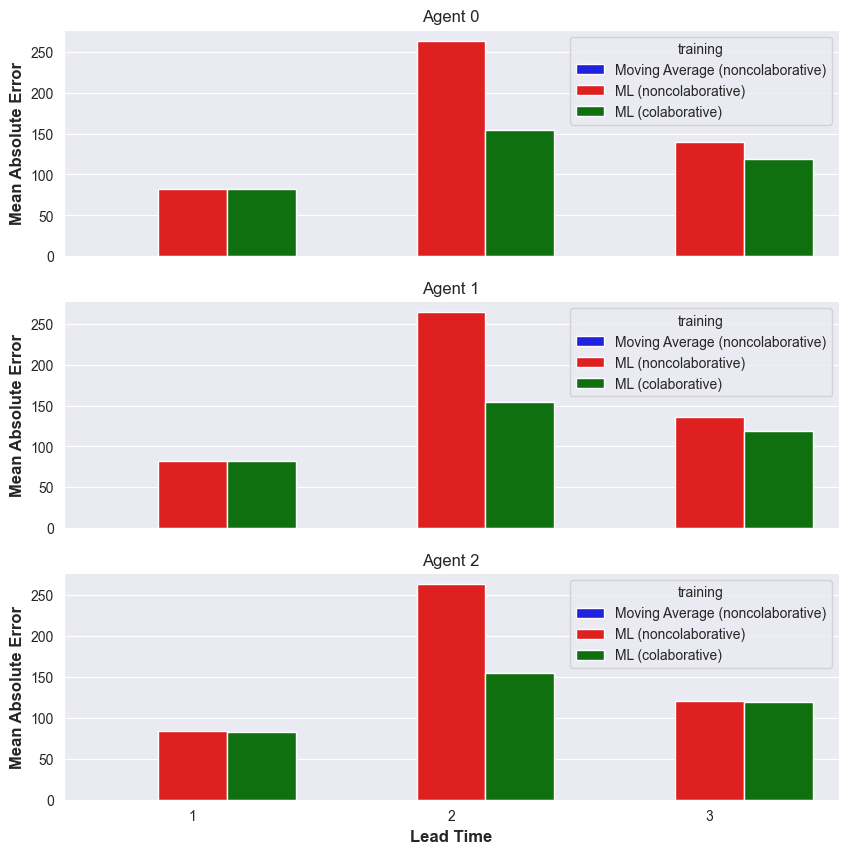

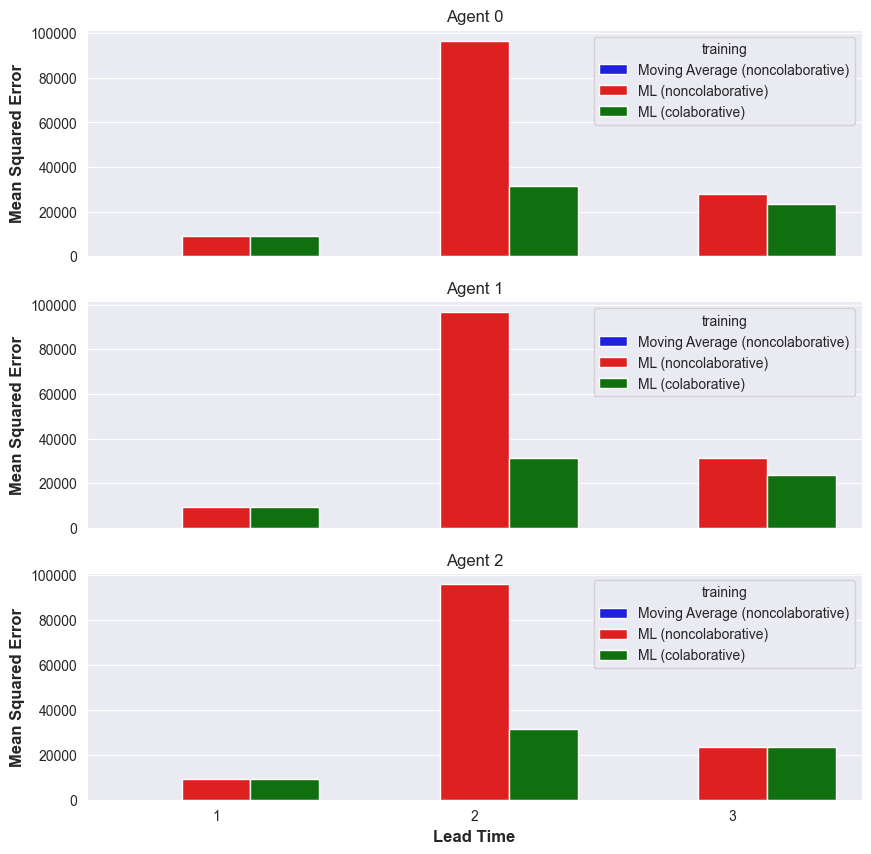

In [ ]:
max_agent_id = 2
for metric in metrics:
    df = df_dict_agent[metric]

    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True) 
    hue_order = ['Moving Average (noncolaborative)', 'ML (noncolaborative)', 'ML (colaborative)']
    
    for i in range(max_agent_id+1):
        column = f"run_0_agent_{i}"
        sns.barplot(data=df, x = 'lead_time_l0', y=column, hue='training', hue_order=hue_order, ax=axs[i], palette=['blue', 'red', 'green'])
        axs[i].set_title(f"Agent {i}")
        axs[i].set_xlabel("Lead Time", fontweight='bold', size = 12)
    if metric == "MAE":
        axs[0].set_ylabel("Mean Absolute Error", size = 12, fontweight='bold')
        axs[1].set_ylabel("Mean Absolute Error", size = 12, fontweight='bold')
        axs[2].set_ylabel("Mean Absolute Error", size = 12, fontweight='bold')
    if metric == "MSE":
        axs[0].set_ylabel("Mean Squared Error", size = 12, fontweight='bold')
        axs[1].set_ylabel("Mean Squared Error", size = 12, fontweight='bold')
        axs[2].set_ylabel("Mean Squared Error", size = 12, fontweight='bold')
        
    # plt.legend(loc= 2)
    # img_path = f"Echtwelt_{metric}_Results_Agent.png"
    # plt.tight_layout()
    # plt.savefig(img_path)
    # plt.close()